<a href="https://colab.research.google.com/github/Kushashu-1/DeepLearning_Project/blob/main/Brain_Tumar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Neural Network Project 
### Topic under : Health Care Analysis
### Objective is to build model that would Classify presence of tumor or not on the Basis of MRI Scan  

In [ ]:
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Data/brain_tumor_dataset')

['no', 'yes']

In [ ]:
yes = os.listdir('/content/drive/MyDrive/Colab Notebooks/Data/brain_tumor_dataset/yes')
no = os.listdir('/content/drive/MyDrive/Colab Notebooks/Data/brain_tumor_dataset/no')

In [ ]:
## Combining Entire Yes and No Data Set input 
data =  np.concatenate([yes ,no])
print("Data Size" ,len(data))

Data Size 253


In [ ]:
## Creating Target Array (1 : Tumar , 0 :Not Tumar)
target_x = np.full(len(yes),1)
print(len(target_x))
target_y = np.full(len(no),0)
print(len(target_y))
data_target = np.concatenate([target_x,target_y])

155
98


In [ ]:
print(data)
print(data_target)

['Y101.jpg' 'Y10.jpg' 'Y103.jpg' 'Y102.jpg' 'Y100.JPG' 'Y1.jpg' 'Y105.jpg'
 'Y114.JPG' 'Y112.JPG' 'Y115.JPG' 'Y12.jpg' 'Y113.JPG' 'Y109.JPG'
 'Y117.JPG' 'Y13.jpg' 'Y108.jpg' 'Y11.jpg' 'Y111.JPG' 'Y106.jpg'
 'Y107.jpg' 'Y120.JPG' 'Y116.JPG' 'Y14.jpg' 'Y146.JPG' 'Y104.jpg'
 'Y155.JPG' 'Y162.jpg' 'Y156.JPG' 'Y148.JPG' 'Y16.JPG' 'Y159.JPG'
 'Y154.jpg' 'Y158.JPG' 'Y163.JPG' 'Y165.JPG' 'Y15.jpg' 'Y160.JPG'
 'Y157.JPG' 'Y147.JPG' 'Y161.JPG' 'Y153.jpg' 'Y164.JPG' 'Y168.jpg'
 'Y180.jpg' 'Y170.JPG' 'Y183.jpg' 'Y186.jpg' 'Y188.jpg' 'Y17.jpg'
 'Y184.JPG' 'Y167.JPG' 'Y187.jpg' 'Y182.JPG' 'Y169.jpg' 'Y181.jpg'
 'Y18.JPG' 'Y166.JPG' 'Y185.jpg' 'Y243.JPG' 'Y23.JPG' 'Y2.jpg' 'Y20.jpg'
 'Y195.JPG' 'Y194.jpg' 'Y193.JPG' 'Y242.JPG' 'Y22.jpg' 'Y21.jpg'
 'Y244.JPG' 'Y19.JPG' 'Y192.JPG' 'Y24.jpg' 'Y259.JPG' 'Y249.JPG' 'Y25.jpg'
 'Y251.JPG' 'Y258.JPG' 'Y255.JPG' 'Y26.jpg' 'Y252.jpg' 'Y28.jpg'
 'Y250.jpg' 'Y256.JPG' 'Y253.JPG' 'Y257.jpg' 'Y246.JPG' 'Y247.JPG'
 'Y27.jpg' 'Y254.jpg' 'Y248.JPG' 'Y245.jpg' 'Y38.jp

In [ ]:
yes_values=os.listdir('/content/drive/MyDrive/Colab Notebooks/Data/brain_tumor_dataset/yes')
no_values =os.listdir('/content/drive/MyDrive/Colab Notebooks/Data/brain_tumor_dataset/no')

In [ ]:
X_data =[]
for file in yes_values:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
for file in no_values:
     img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/brain_tumor_dataset/no/'+file)
     face = cv2.resize(img, (32, 32) )
     (b,g,r) = cv2.split(face)
     img = cv2.merge([r,g,b])
     X_data.append(img)

In [ ]:
### Using Squeeze Function to remove single dimentional entries from 
## the shape of an array
X = np.squeeze(X_data)
X.shape

(253, 32, 32, 3)

In [ ]:
## Normalization 
X = X.astype('float32')
X/=255

In [ ]:
print(X)

[[[[0.00392157 0.00392157 0.00392157]
   [0.         0.         0.        ]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.00784314 0.00784314 0.00784314]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.00392157 0.00392157 0.00392157]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.0

In [ ]:
## Split Testing and Training Data
(x_train, y_train)= (X[40:190],data_target[40:190]) 
x_test = np.concatenate([X[:40],X[190:]])
y_test = np.concatenate([data_target[:40],data_target[190:]])
(x_valid , y_valid) = (x_test[20:55], y_test[20:55])
print(x_train.shape)
print(x_test.shape)
print(y_valid)
print(y_test)

(150, 32, 32, 3)
(103, 32, 32, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 16)         

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=50,
         validation_data=(x_valid, y_valid),)

Epoch 1/50
2/2 [==============================] - 2s 386ms/step - loss: 0.7097 - acc: 0.3400 - val_loss: 0.6838 - val_acc: 0.5714
Epoch 2/50
2/2 [==============================] - 1s 182ms/step - loss: 0.5712 - acc: 0.7667 - val_loss: 0.6562 - val_acc: 0.5714
Epoch 3/50
2/2 [==============================] - 1s 169ms/step - loss: 0.5327 - acc: 0.7667 - val_loss: 0.6664 - val_acc: 0.5714
Epoch 4/50
2/2 [==============================] - 1s 193ms/step - loss: 0.5875 - acc: 0.7667 - val_loss: 0.6672 - val_acc: 0.5714
Epoch 5/50
2/2 [==============================] - 1s 181ms/step - loss: 0.5868 - acc: 0.7667 - val_loss: 0.6518 - val_acc: 0.5714
Epoch 6/50
2/2 [==============================] - 1s 193ms/step - loss: 0.5396 - acc: 0.7667 - val_loss: 0.6506 - val_acc: 0.5714
Epoch 7/50
2/2 [==============================] - 1s 163ms/step - loss: 0.5673 - acc: 0.7667 - val_loss: 0.6486 - val_acc: 0.5714
Epoch 8/50
2/2 [==============================] - 1s 164ms/step - loss: 0.5684 - acc: 0.76

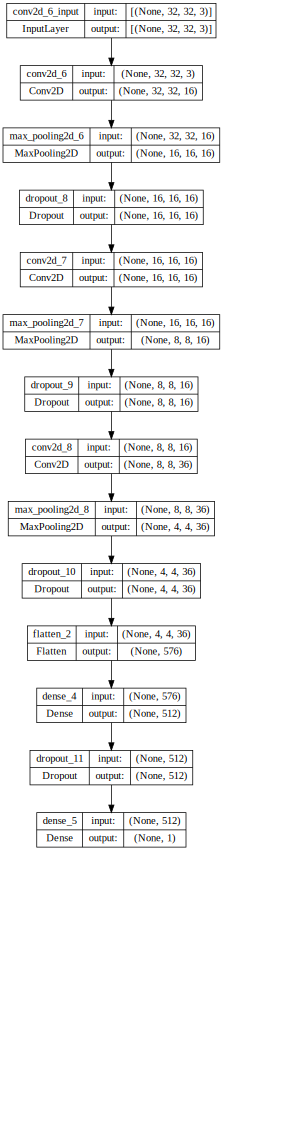

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [ ]:
score = model.evaluate(x_test , y_test,verbose = 0)
print("Test Accuracy : ",score[1]*100)

Test Accuracy :  80.58252334594727


In [ ]:
labels =["No",  # index 0
        "Yes",      # index 1
        ]

4/4 [==============================] - 0s 84ms/step


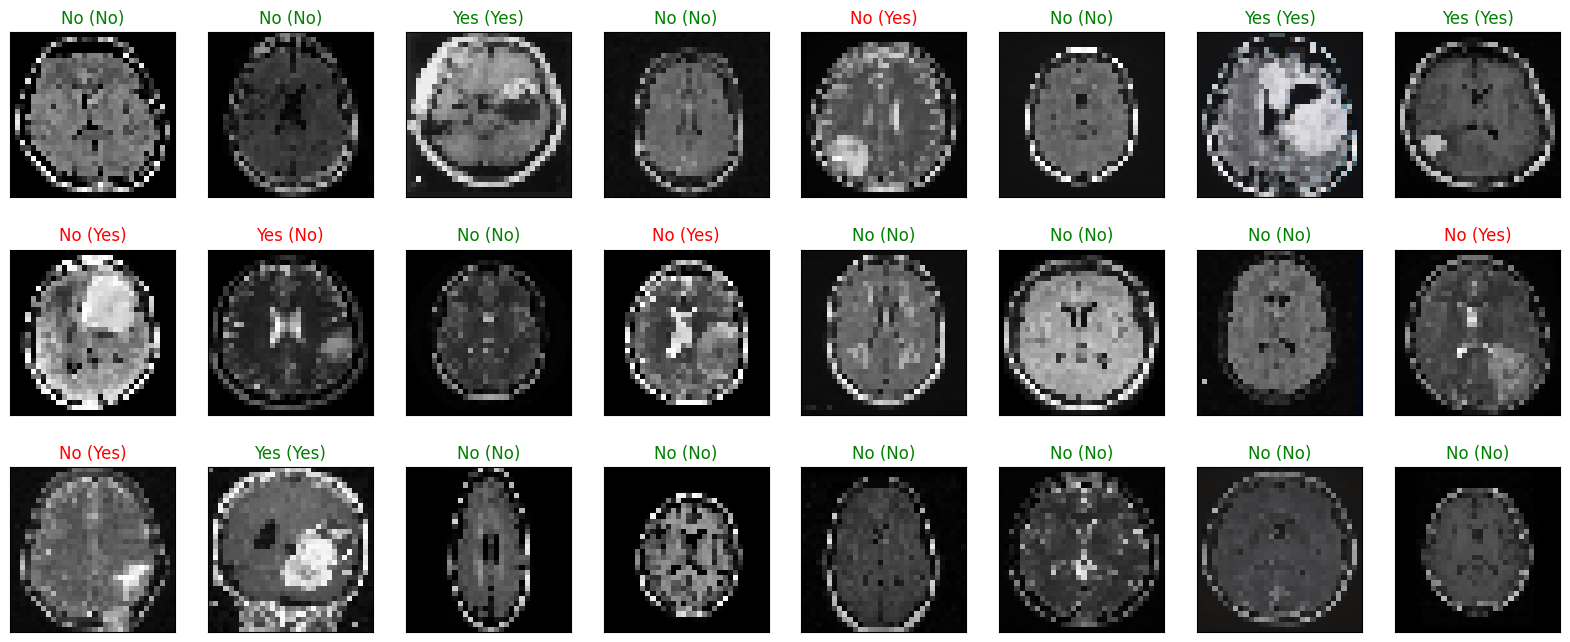

In [ ]:
y_hat = model.predict(x_test)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(3, 8, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = 1 if y_hat[index]>=0.5 else 0
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()